In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

DATA_PATH = f'{os.getcwd()}\\names\\'

In [10]:
def names_count_for_period(names, years):
    names_by_year = {}
    for year in years:
        names_by_year[year] = pd.read_csv(
            DATA_PATH + 'yob{}.txt'.format(str(year)),
            names=['Name', 'Gender', 'Count'],
            engine='python'
        )
    df = pd.concat(names_by_year, names=['Year', 'Pos'])
    return df\
        .groupby([df.index.get_level_values(0), 'Name']).sum()\
        .query('Name == {}'.format(names)).unstack('Name')

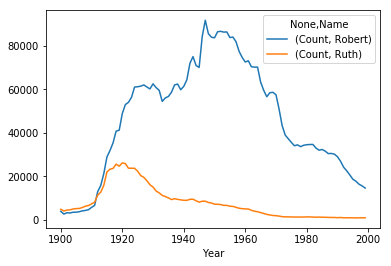

In [11]:
names_count_for_period(['Ruth', 'Robert'], range(1900, 2000, 1)).plot()

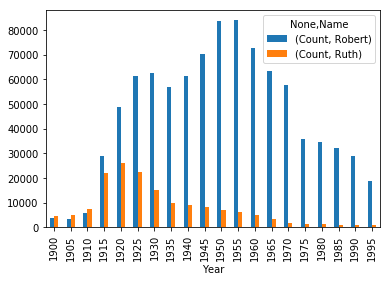

In [12]:
names_count_for_period(['Ruth', 'Robert'], range(1900, 2000, 5)).plot.bar()

In [8]:
def count_top10(year, letter):
    names = pd.read_csv(DATA_PATH + 'yob{}.txt'.format(str(year)),
                        names=['Name', 'Gender', 'Count'],
                        engine='python'
                       )
    return names[names['Name'].str.match(letter)]\
        .groupby('Name').sum()\
        .sort_values(by=['Count'], ascending=False).head(10)

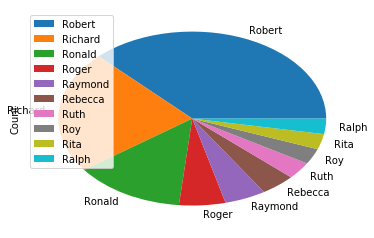

In [9]:
count_top10(1950, 'R').plot.pie(y='Count')

In [18]:
def consonant_letters(years):
    consonants = list("bcdfghjklmnpqrstvexz")
    df = pd.concat([
        pd.read_csv(DATA_PATH + 'yob{}.txt'.format(str(year)),
                    names=['Name', 'Gender', 'Count'],
                    engine='python'
                   )
        for year in years
    ])\
    .groupby('Name', as_index=False).sum()
    df['Consonants'] = df.apply(lambda row: sum((row.Name).count(letter) for letter in consonants), axis=1)
    return df


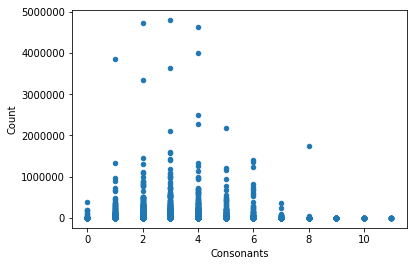

In [20]:
consonant_letters(range(1900, 2000, 1)).plot.scatter(x='Consonants', y='Count')